In [82]:
# Zurisaday Espadas Martínez
# 30/11/23
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [83]:
# Read a CSV file
tarifas_por_zonas = pd.read_csv('Tarifas por zonas 2016-2017.csv')
tarifas_por_zonas.head()

,zona,capacidad_base_firme,uso_base_firme,capacidad_base_temporal,uso_base_temporal,maxima_base_interrumpible,minima_base_interrumpible,volumetrica,fecha_inicio,fecha_fin
0,Sur,1.52306,0.01585,1.53894,0.01585,1.52392,0.01585,1.64799,2016-01-01,2016-03-31
1,Centro,2.84902,0.03021,2.87937,0.03021,2.85117,0.03021,3.08510,2016-01-01,2016-03-31
2,Occidente,1.57302,0.01552,1.58855,0.01552,1.57293,0.01552,1.70009,2016-01-01,2016-03-31
3,Golfo,3.06847,0.02751,3.09649,0.02751,3.06658,0.02751,3.30889,2016-01-01,2016-03-31
4,Norte,4.34706,0.04460,4.39141,0.04460,4.34791,0.04460,4.70128,2016-01-01,2016-03-31


## Gráfico de línea para visualizar la variación de las tarifas (servicio base firme) contra el tiempo para los dos años.

In [84]:
# Convertir las columnas de fecha a datetime
tarifas_por_zonas['fecha_inicio'] = pd.to_datetime(tarifas_por_zonas['fecha_inicio'])
tarifas_por_zonas['fecha_fin'] = pd.to_datetime(tarifas_por_zonas['fecha_fin'])

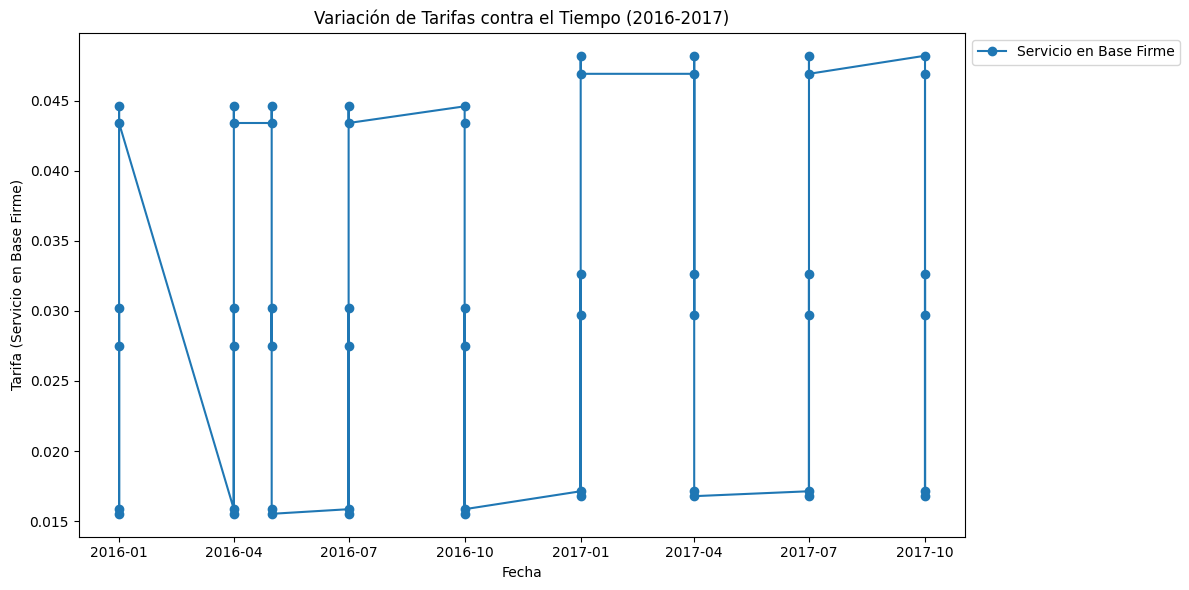

In [85]:
# Filtrar por servicio en base firme
servicio_firme_data = tarifas_por_zonas[tarifas_por_zonas['uso_base_firme'] > 0]

# Ordena por fecha
servicio_firme_data = servicio_firme_data.sort_values(by='fecha_inicio')

# Gráfico
plt.figure(figsize=(12, 6))
plt.plot(servicio_firme_data['fecha_inicio'], servicio_firme_data['uso_base_firme'], label='Servicio en Base Firme', marker='o', linestyle='-')

# Añade etiquetas y leyenda
plt.title('Variación de Tarifas contra el Tiempo (2016-2017)')
plt.xlabel('Fecha')
plt.ylabel('Tarifa (Servicio en Base Firme)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.tight_layout()
plt.show()

## Gráfico de barras que señale máximos y mínimos de las tarifas por mes de cada uno de los dos años

In [92]:
# Filtra solo el tipo de servicio base firme
tarifas_base_firme = tarifas_por_zonas[tarifas_por_zonas['uso_base_firme'].notnull()]

tarifas_base_firme['año'] = tarifas_base_firme['fecha_inicio'].dt.year
tarifas_base_firme['mes'] = tarifas_base_firme['fecha_inicio'].dt.month

# Agrupa por año, mes, calculando máximos y mínimos
tarifas_por_mes = tarifas_base_firme.groupby(['año', 'mes']).agg({'uso_base_firme': ['max', 'min']})

tarifas_por_mes = tarifas_por_mes.reset_index()
tarifas_por_mes

año mes uso_base_firme     
                       max  min
0  2016   1        0.04460  0.0
1  2016   4        0.04460  0.0
2  2016   5        0.04460  0.0
3  2016   7        0.04460  0.0
4  2016  10        0.04460  0.0
5  2017   1        0.04821  0.0
6  2017   4        0.04821  0.0
7  2017   7        0.04821  0.0
8  2017  10        0.04821  0.0

/Users/zuryespadas/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/Users/zuryespadas/miniconda3/lib/python3.9/site-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


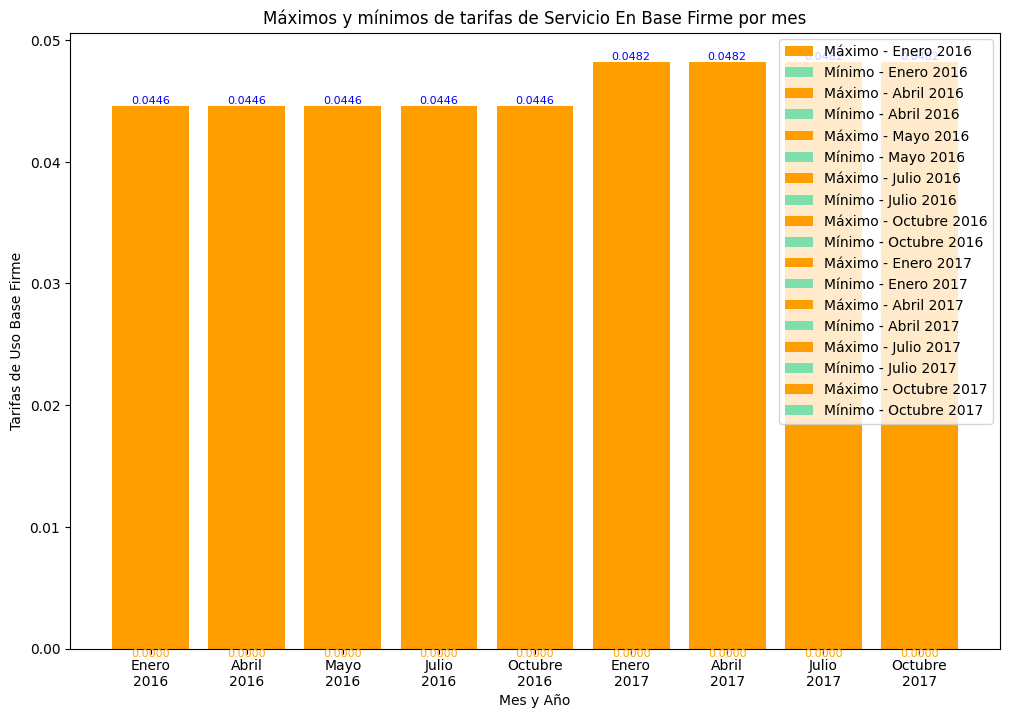

In [87]:
bar_width = 0.35

# Nombres de los meses
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Crea un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 8))

# Itera sobre los años y meses y crea barras para máximos y mínimos con colores diferentes
for i, (año, mes) in enumerate(zip(tarifas_por_mes['año'], tarifas_por_mes['mes'])):
    max_value = tarifas_por_mes.loc[(tarifas_por_mes['año'] == año) & (tarifas_por_mes['mes'] == mes), ('uso_base_firme', 'max')]
    min_value = tarifas_por_mes.loc[(tarifas_por_mes['año'] == año) & (tarifas_por_mes['mes'] == mes), ('uso_base_firme', 'min')]
    ax.bar(i, max_value, color='#FF9E00', label=f'Máximo - {nombres_meses[mes-1]} {año}')
    ax.bar(i, min_value, color='#00D58E', alpha=0.5, label=f'Mínimo - {nombres_meses[mes-1]} {año}')
    # Tags con los valores
    ax.text(i, max_value, f'{max_value.values[0]:.4f}', ha='center', va='bottom', color='blue', fontsize=8)
    ax.text(i, min_value, f'{min_value.values[0]:.4f}', ha='center', va='top', color='orange', fontsize=8)

ax.set_xticks(range(len(tarifas_por_mes)))
ax.set_xticklabels([f'{nombres_meses[mes-1]}\n{año}' for año, mes in zip(tarifas_por_mes['año'], tarifas_por_mes['mes'])])
ax.set_xlabel('Mes y Año')
ax.set_ylabel('Tarifas de Uso Base Firme')
ax.set_title('Máximos y mínimos de tarifas de Servicio En Base Firme por mes')
ax.legend()
plt.show()

## Gráfico que nos permita ver la evolución de las tarifas por servicio con el paso del tiempo.

In [88]:
tarifas_por_zonas['uso_base_interrumpible'] = (tarifas_por_zonas['maxima_base_interrumpible'] + tarifas_por_zonas['minima_base_interrumpible']) / 2
tarifas_por_zonas.drop(['maxima_base_interrumpible', 'minima_base_interrumpible', 'capacidad_base_firme', 'capacidad_base_temporal'], axis=1, inplace=True)

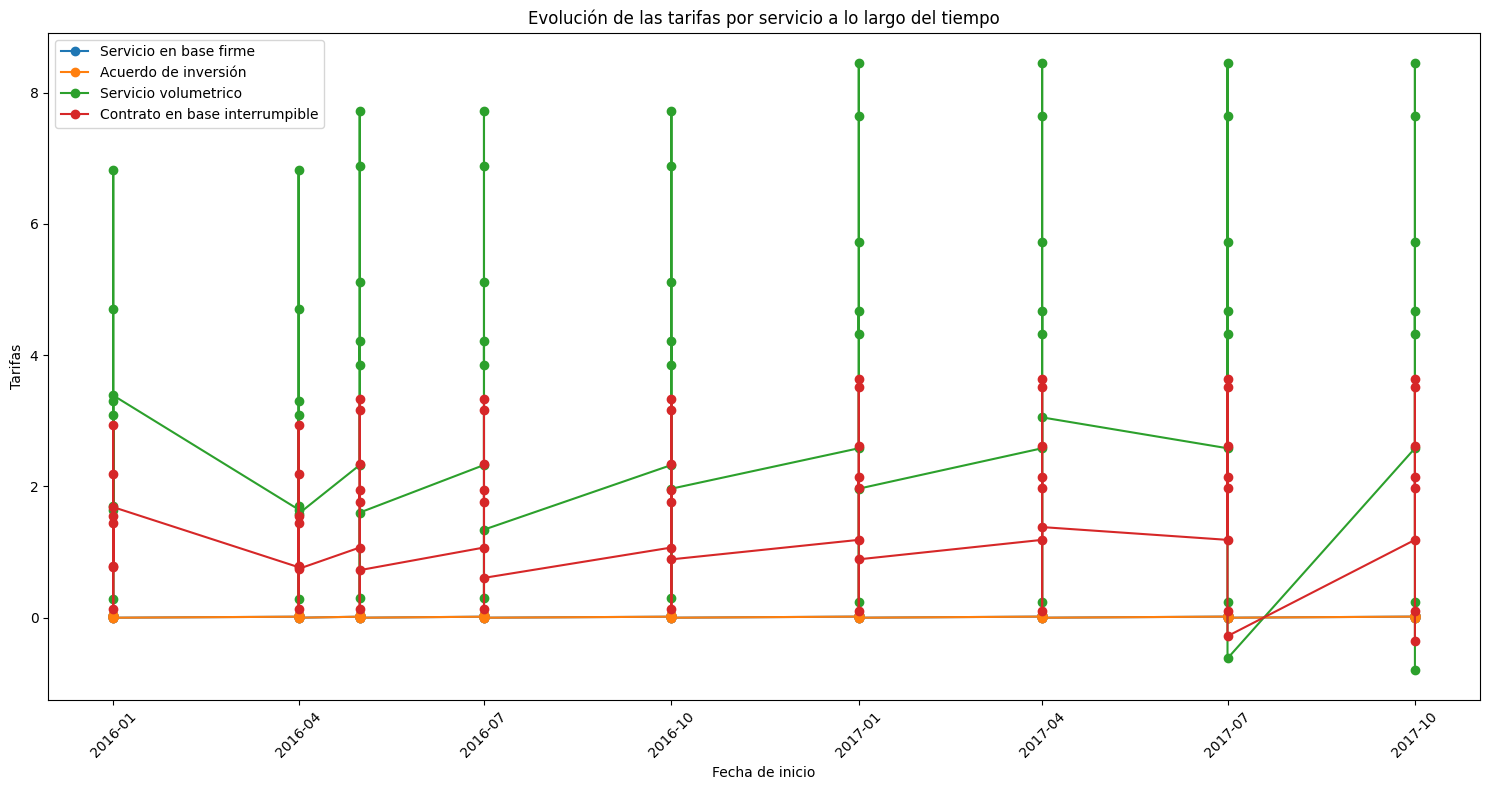

In [90]:
# Crear una figura y ejes
plt.figure(figsize=(15, 8))
ax = plt.subplot(111)

# Crear líneas para cada servicio y sus respectivas tarifas
plt.plot(tarifas_por_zonas['fecha_inicio'], tarifas_por_zonas['uso_base_firme'], label='Servicio en base firme', marker='o')
plt.plot(tarifas_por_zonas['fecha_inicio'], tarifas_por_zonas['uso_base_temporal'], label='Acuerdo de inversión', marker='o')
plt.plot(tarifas_por_zonas['fecha_inicio'], tarifas_por_zonas['volumetrica'], label='Servicio volumetrico', marker='o')
plt.plot(tarifas_por_zonas['fecha_inicio'], tarifas_por_zonas['uso_base_interrumpible'], label='Contrato en base interrumpible', marker='o')

plt.legend(loc='upper left')
plt.xlabel('Fecha de inicio')
plt.ylabel('Tarifas')
plt.title('Evolución de las tarifas por servicio a lo largo del tiempo')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()